In [26]:
import os
os.chdir("/Users/zyxu/Documents/py/vision/adaptive_inference/")
import numpy as np
from collections import defaultdict 


In [7]:
data_path = "/Users/zyxu/Documents/py/vision/adaptive_inference/log/resnet50_imagenet"

In [8]:
i = 1

file

'resnet50_cifar10_skip1.npz'

In [31]:
res = defaultdict(list)
for i in range(16):
    file = f"resnet50_cifar10_skip{i}.npz"
    data = np.load(f"{data_path}/{file}")
    for key in data:
        res[key].append(data[key])

In [32]:
res.keys()

dict_keys(['masks', 'accs', 'over_accs', 'macs_total'])

In [33]:
res['over_accs']

[array([0.77044]),
 array([0.7673 , 0.76046, 0.74746, 0.76112, 0.75774, 0.76372, 0.75076,
        0.75984, 0.76024, 0.75946, 0.757  , 0.75446, 0.74162, 0.74888,
        0.7595 ]),
 array([0.7447 , 0.75346, 0.73958, 0.70588, 0.7429 , 0.72138, 0.74686,
        0.74822, 0.74122, 0.72002, 0.7512 , 0.72464, 0.75966, 0.74304,
        0.72138, 0.7314 , 0.74876, 0.74294, 0.68884, 0.73942, 0.71518,
        0.72688, 0.7267 , 0.70588, 0.73426, 0.74822, 0.73248, 0.74134,
        0.74946, 0.72446, 0.75346, 0.73896, 0.73248, 0.74722, 0.73582,
        0.72906, 0.70014, 0.74946, 0.74304, 0.72002, 0.74608, 0.72446,
        0.74068, 0.73884, 0.73248, 0.74384, 0.73342, 0.73038, 0.75198,
        0.74608, 0.73938, 0.74506, 0.7447 , 0.72906, 0.73302, 0.74304,
        0.73506, 0.72714, 0.74506, 0.73868, 0.74608, 0.74134, 0.7173 ,
        0.75736]),
 array([0.70294, 0.71748, 0.68202, 0.70652, 0.73514, 0.72338, 0.6929 ,
        0.71224, 0.74488, 0.70138, 0.71668, 0.72176, 0.68878, 0.68806,
        0.70254, 0.5

In [34]:
res['macs_total']

[array([1.]),
 array([0.94614685, 0.94614685, 0.93390083, 0.94658506, 0.94658506,
        0.94658506, 0.93422949, 0.94680417, 0.94680417, 0.94680417,
        0.94680417, 0.94680417, 0.93439388, 0.94691372, 0.94691372]),
 array([0.89295101, 0.89295101, 0.89317012, 0.88048589, 0.89295101,
        0.89360833, 0.89371794, 0.89295101, 0.8803764 , 0.89229369,
        0.89349884, 0.89360833, 0.89295101, 0.89338923, 0.89360833,
        0.88103372, 0.89338928, 0.89338923, 0.8813076 , 0.88054073,
        0.86829472, 0.88103372, 0.89317012, 0.88048589, 0.88097894,
        0.89306062, 0.8803764 , 0.89349878, 0.89338923, 0.88097894,
        0.89295101, 0.89360839, 0.8803764 , 0.89295101, 0.89349878,
        0.89360833, 0.89382744, 0.89338923, 0.89338923, 0.89229369,
        0.89338923, 0.88097894, 0.89306062, 0.89349884, 0.8803764 ,
        0.89338923, 0.89371794, 0.88048589, 0.89349878, 0.89338923,
        0.89338923, 0.89371794, 0.89295101, 0.89360833, 0.880705  ,
        0.89338923, 0.88070506, 

In [37]:
accs = np.concatenate(res['over_accs'])
accs[:5]

array([0.77044, 0.7673 , 0.76046, 0.74746, 0.76112])

In [39]:
macs = np.concatenate(res['macs_total'])
macs[-5:]

array([0.21583664, 0.22852086, 0.21627486, 0.21627486, 0.16242172])

In [41]:
res_vis = {"accs": accs, "macs": macs}

## dataframe

In [40]:
import pandas as pd

In [42]:
df = pd.DataFrame(res_vis)
df

,accs,macs
0,0.77044,1.000000
1,0.76730,0.946147
2,0.76046,0.946147
3,0.74746,0.933901
4,0.76112,0.946585
...,...,...
795,0.00194,0.215837
796,0.00322,0.228521
797,0.00246,0.216275
798,0.00246,0.216275


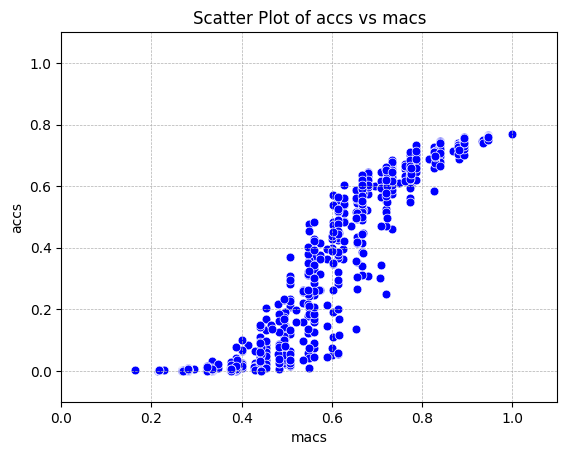

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Using Seaborn to plot
sns.scatterplot(data=df, x='macs', y='accs', color='blue', s=40)

plt.xlim(0, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Scatter Plot of accs vs macs')
plt.show()
